In [3]:
# 필수 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titan_df = pd.read_csv('./CSV/titanic/train.csv', engine='python')
titan_df
titan_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print('\n ### 학습 데이터 정보###')
titan_df.info()


 ### 학습 데이터 정보###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titan_df.Age.fillna(titan_df.Age.mean(), inplace=True)
titan_df.Cabin.fillna('N', inplace=True)
titan_df.Embarked.fillna('N', inplace=True)
print(f'데이터 셋 Null값의 개수 : {titan_df.isna().sum().sum()}')


데이터 셋 Null값의 개수 0


In [19]:
# titan_df Cabin 분포 살펴보기
titan_df.Cabin.str[0].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [24]:
# 성별에 따른 생존률과의 관계
titan_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [25]:
# 여성의 생존률
233 / (233+81)

0.7420382165605095

In [26]:
# 남성의 생존률
109 / (468+109)

0.18890814558058924

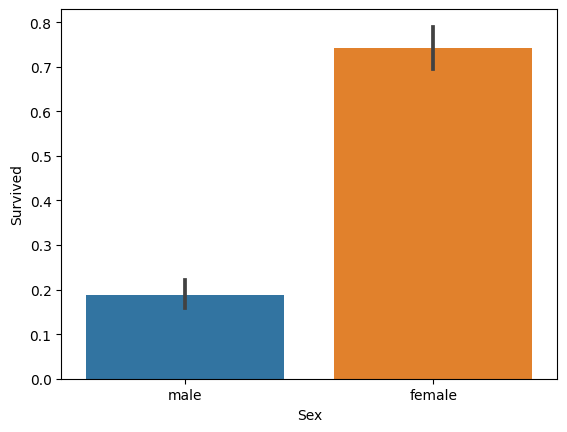

In [28]:
# sns-seaborn을 통한 데이터 시각화 = 성별 vs 생존률

sns.barplot(x='Sex', y='Survived', data=titan_df)
plt.show()

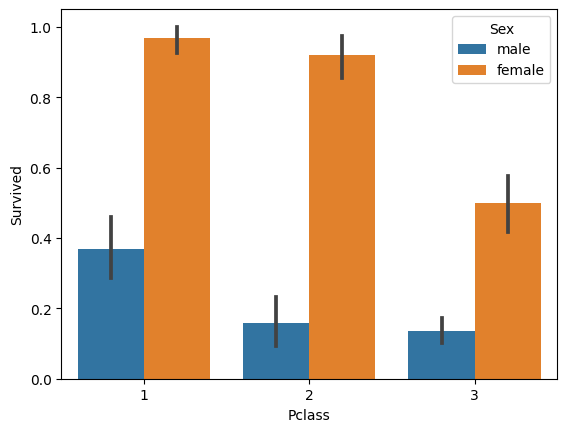

In [33]:
# sns를 활용한 바차트 = 빈부 vs 생존률 hue = Sex
sns.barplot(x='Pclass', y='Survived', data=titan_df, hue='Sex')
plt.show()

In [35]:
'''
0~5세는 Baby
6~12세는 Child
13~18세는 Teenager
19~25세는 Student
26~35세는 Young Adult
36~60세는 Adult
61세 이상은 Elderly
'''

'\n0~5세는 Baby\n6~12세는 Child\n13~18세는 Teenager\n19~25세는 Student\n26~35세는 Young Adult\n36~60세는 Adult\n61세 이상은 Elderly\n'

In [39]:
# 입력 age에 따라서 구분 값을 반환하는 함수 생성
# df의 apply lambda에 적용.
def get_cat(age):
    if age < 0:
        return 'unknown'
    elif age <= 5:
        return 'Baby'
    elif age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Theenager'
    elif age <= 25:
        return 'Young_Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

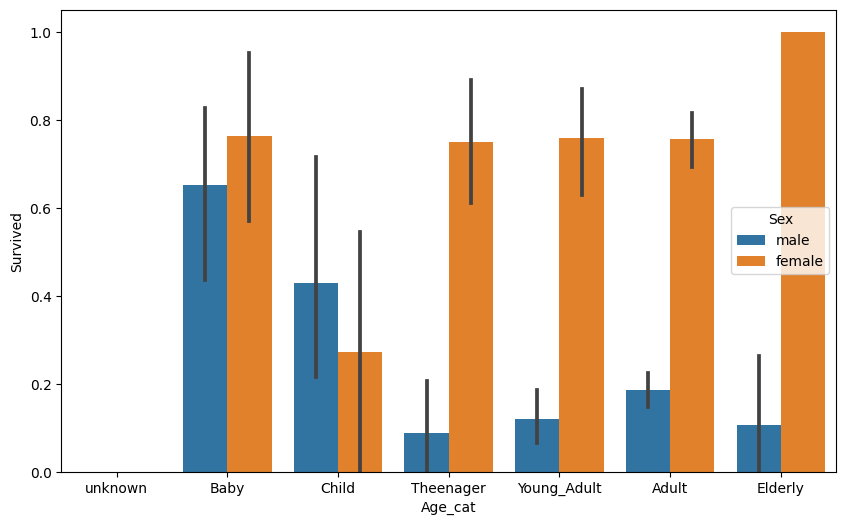

In [54]:
# 막대그래프의 크기 figure를 더 크게 설정 - plt(matpltlib)
plt.figure(figsize=(10, 6))

# x축의 값을 순차적으로 표시하기 위해 - 리스트 생성
group_names = ['unknown', 'Baby', 'Child', 'Theenager', 'Young_Adult', 'Adult', 'Elderly']

# x축의 값을 - get_cat(x)로 정의
titan_df['Age_cat'] = titan_df['Age'].apply(lambda x : get_cat(x))

sns.barplot(x='Age_cat', y='Survived', data=titan_df, hue='Sex', order=group_names)
plt.show()

In [55]:
titan_df1 = titan_df.drop(['Age_cat'], axis=1)

In [63]:
# 문자들을 -> 숫자로 변환
# 문자들을 색출
# 1. titan_df1.info()

# 2. select_dtypes를 통해 문자열 자료로 선택
titan_df1.select_dtypes(include=object).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [64]:
# 문자 -> 숫자 :: 1. Label encoding 레이블 인코딩 2. Ont-Hot encoding 원-핫 인코딩 : pd.get_dummies()
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [67]:
# encoder.fit_transform(titan_df1.Name)

In [75]:
for index, name in enumerate(titan_df1.select_dtypes(include=object).columns):
    titan_df1[name] = encoder.fit_transform(titan_df1[name]) # 원본이 안바뀌므로 다시금 재정의가 필요


In [79]:
# ML(Machine Learning) 알고리즘에서 불필요 컬럼(=속성) 제거
# 일반적으로 식별자를 제거
titan_df1
titanic_df = titan_df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,3
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,3
3,1,1,0,35.000000,1,0,53.1000,3
4,0,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3
887,1,1,0,19.000000,0,0,30.0000,3
888,0,3,0,29.699118,1,2,23.4500,3
889,1,1,1,26.000000,0,0,30.0000,0


In [80]:
# 위의 전처리 과정을 함수화 진행
# 1. 결측치 <- 대체
# 2. 문자 -> 숫자
# 3. 불필요 속성 제거

# 1. Na 처리 함수
def fill_null(df):
    df.Age.fillna(df['Age'].mean(), inplace=True) # 평균값 대체
    df.Fare.fillna(0, inplace=True) # 최소값 대체
    df.Cabin.fillna('N', inplace=True) # 결측치를 'N'으로 대체
    df.Embarked.fillna('N', inplace=True) # 결측치를 'N'으로 대체
    return df

# 2. 문자 -> 숫자 함수
def label_ftrs(df):
    for index, name in enumerate(df.select_dtypes(include=object).columns):
        df[name] = encoder.fit_transform(df[name]) # 원본이 안바뀌므로 다시금 재정의가 필요
    return df
    
# 3. 불필요 속성 제거
def drop_ftrs(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df
    

In [81]:
# 4 = 1 + 2 + 3 함수화
def all_pre_ftrs(df):
    fill_null(df)
    label_ftrs(df)
    drop_ftrs(df)
    return df
    

In [82]:
bef_titan = pd.read_csv('./CSV/titanic/test.csv')

all_pre_ftrs(bef_titan)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2
